สมาร์ทวอทช์เป็นอุปกรณ์ที่มีการใช้งานพลังงานอย่างต่อเนื่อง และเมื่อมีอายุการใช้งานหลายปีแบตเตอรี่ก็จะเสื่อมอยากรวดเร็ว ซึ่งสามารถประมาณการพลังงานเสื่อมได้ด้วยฟังก์ชัน P(t) โดยที่
t คือ เวลาที่ผ่านไป (ชั่วโมง)
P(t) คือ พลังงานในสมาร์ทวอทช์ (เปอร์เซ็นต์)

เนื่องจากสมาร์ทวอทช์เป็นอุปกรณ์ที่มีชิปการคำนวณที่จำกัดมาก การคำนวณ P(t) โดยตรงอาจซับซ้อนในอุปกรณ์ที่มีทรัพยากรจำกัด จึงต้องใช้อนุกรมเทย์เลอร์ที่ x เข้าใกล้ 1 เพื่อประมาณค่า P(t) โดยการคำนวณจะละพจน์ตั้งแต่ยกกำลัง 5 เป็นต้นไป

ต้องการให้แสดงกราฟสมการอนุกรมเทย์เลอร์สำหรับการคำนวณพลังงานเสื่อมในสมาร์ทวอทช์ที่เปลี่ยนแปลงไป โดยกำหนดให้
เส้นกราฟ คือ np.linspace(-1, 3, 500)
แสดงผลกราฟ คือ plt.xlim(-1, 3); plt.ylim(0, 100)

ผลลัพธ์ของกราฟตามรูป

<lambdifygenerated-9>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (t + 1)**(-1.0)


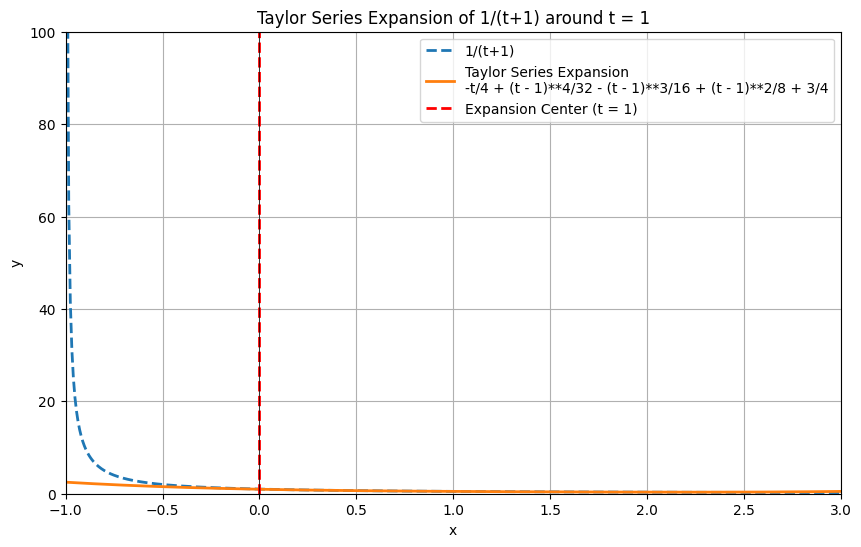

In [5]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

t_var = sym.symbols('t')
f_expr = 1 / (t_var + 1)
sol_expr = f_expr.series(t_var, x0=1, n=5).removeO()

f_numeric_func = sym.lambdify(t_var, f_expr, 'numpy')
taylor_numeric_func = sym.lambdify(t_var, sol_expr, 'numpy')

x_values = np.linspace(-1, 3, 500)

plt.figure(figsize=(10, 6))
plt.plot(x_values, f_numeric_func(x_values), label='1/(t+1)', linestyle='--', linewidth=2)
plt.plot(x_values, taylor_numeric_func(x_values), label=f'Taylor Series Expansion\n{sol_expr}', linewidth=2)
plt.axvline(0, color='red', linewidth=2, linestyle='--', label='Expansion Center (t = 1)')
plt.title('Taylor Series Expansion of 1/(t+1) around t = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1, 3)
plt.ylim(0, 100)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()


ในโรงงานแห่งหนึ่ง นักศึกษาได้รับงานให้ควบคุมหุ่นยนต์ โดยหุ่นยนต์ต้องคำนวณค่าฟังก์ชัน f(x) เพื่อปรับการเคลื่อนที่ของแขนกลในแต่ละมุมให้แม่นยำมากที่สุด โดยหัวหน้างานต้องการให้ใช้อนุกรมเทย์เลอร์ที่ x เข้าใกล้ 0 และปรับค่าละพจน์ตั้งแต่ยกกำลัง 15, 20, 25, 30, 35, 40, 45, 50 และ 55 ตามลำดับ เพื่อดูแนวโน้มของการละพจน์ในภาพใหญ่ภาพเดียว ผลลัพธ์แสดงตามรูป

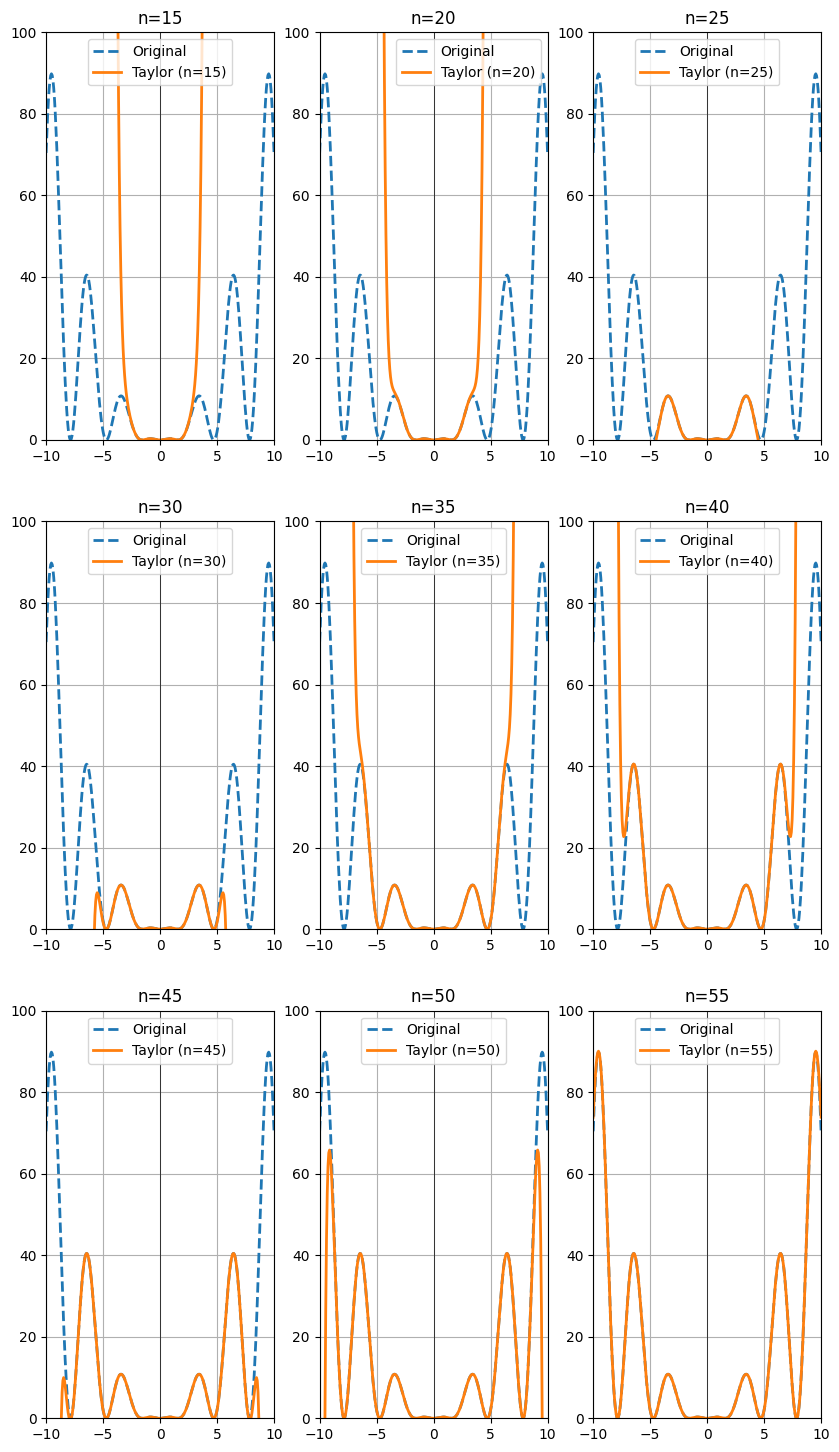

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x_var = sp.symbols('x')
f_expr = (x_var**2)*(sp.cos(x_var)**2)
num_terms = 15

x_values = np.linspace(-10, 10, 300)

fig, axs = plt.subplots(3, 3, figsize=(10, 18))
for i in range(0, 3):
    for j in range(0, 3):
        f_taylor_expr = f_expr.series(x_var, 0, num_terms).removeO()
        f_numeric_func = sp.lambdify(x_var, f_expr)
        f_taylor_numeric_func = sp.lambdify(x_var, f_taylor_expr)

        axs[i][j].plot(x_values, f_numeric_func(x_values), label='Original', linestyle='--', linewidth=2)
        axs[i][j].plot(x_values, f_taylor_numeric_func(x_values), label=f'Taylor (n={num_terms})', linestyle='-', linewidth=2)
        axs[i][j].axvline(0, color='black', linewidth=0.5)
        axs[i][j].set_title(f'n={num_terms}')
        axs[i][j].set_xlim(-10, 10)
        axs[i][j].set_ylim(0, 100)
        axs[i][j].legend()
        axs[i][j].grid(True)
        num_terms += 5
        
plt.show()

ในระบบเครือข่าย อัตราการถ่ายโอนข้อมูลจากเครื่องเซิร์ฟเวอร์ไปยังผู้ใช้คนที่ i ลดลงตามลำดับของผู้ใช้ และสามารถอธิบายได้ด้วยฟังก์ชัน R(i) โดยที่
i คือ หมายเลขของผู้ใช้ (i = 1, 2, 3, …)
R(i) คือ อัตราการถ่ายโอนข้อมูลสำหรับผู้ใช้คนที่ i (GB/s)

ต้องการให้คำนวณปริมาณข้อมูลที่ถ่ายโอนทั้งหมดจากเซิร์ฟเวอร์ไปยังผู้ใช้ 30 คน โดยใช้คำสั่ง sym.Sum เพื่อคำนวณผลรวมของ R(i) ให้แสดงเป็นทศนิยม 5 ตำแหน่ง

ตอบ
ปริมาณข้อมูลที่ถ่ายโอนทั้งหมดสำหรับผู้ใช้ 30 คน คือ: 1.61215 GB/s

In [8]:
import sympy as sym
i = sym.symbols('i')
data_transfer_rate = 1/i**2
sol = sym.Sum(data_transfer_rate, (i , 1 , 30))
print(f"ปริมาณข้อมูลที่ถ่ายโอนทั้งหมดสำหรับผู้ใช้ 30 คน คือ {sol.doit():.5f} GB/s")

ปริมาณข้อมูลที่ถ่ายโอนทั้งหมดสำหรับผู้ใช้ 30 คน คือ 1.61215 GB/s


จงเขียนโปรแกรมหาคำตอบอนุกรมเทย์เลย์ โดยละพจน์ตั้งแต่ยกกำลัง 5 ของฟังก์ชันต่อไปนี้

In [10]:
import sympy as sym
t = sym.symbols('t')
f = sym.exp(t) * sym.sin(t)
sym.pprint(f.series(t , x0 = 0 , n = 5).removeO())

 3         
t     2    
── + t  + t
3          


จงเขียนโปรแกรมหาคำตอบอนุกรมเทย์เลย์ โดยละพจน์ตั้งแต่ยกกำลัง 6 ของฟังก์ชันต่อไปนี้


In [11]:
import sympy as sym
x = sym.symbols('x')
f = x / sym.sqrt(x**2 + 4)
sym.pprint(f.series(x , x0 = 0 , n = 6).removeO())

   5    3    
3⋅x    x    x
──── - ── + ─
256    16   2


จงเขียนโปรแกรมหาคำตอบอนุกรมทั่วไป ในรูปแบบของทศนิยม ของฟังก์ชันต่อไปนี้


In [12]:
import sympy as sym
n = sym.symbols('n')
f = 1/2**n + 1/3**n
sol = sym.Sum(f, (n , 1 , sym.oo))
print(sol.doit())

3/2


: 